# Analyzing nutritional values with Python

**PROJECT STILL UNDER DEVELOPMENT**

## Introduction

 - Aim: visual description of food in personal diet;
 - The dataset: fppds_dataset.csv, data I collected myself from packages or via online research, so to obtain a dataset tailored to my eatinh habits;
 - Prior expectations: clusterings and superfoods
 - Principle: only collect the data in the dataset, edit here
 - Disclaimer

## To Do

 - Add categories, compare expectation vs reality
 
## Structure

 1. Introduction
 2. Data processing: cleaning and editing
 3. Analisi:
   - distribution of macronutrients & fibers histograms
   - analisis of macronutrient amount vs caloric value per 100g of food
   - the derived estimation of caloric value for each gram of macronutrient (plots and Pearson's r)
   - first impressions on clusters and food groups: comment superfoods, salads etc.
   - analisis of macronutrient amount vs caloric value per portion of food
   - pre labeled categories analisis, comment food groups (add olive oil)
 4. Conclusions
   

In [13]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Exploring and cleaning the data

The dietary information we intend to analise is in the foods_dataset.csv file. It contains most of the information depicted in nutritional value table stamped on food packages in general: in particular, it contains the amount of each macronutrient (i.e., carbohydrates, fats and proteins) per 100 g or 100 ml of food, besides the amount of fibers; the portion size (in percentage of 100 g or 100 ml); the package size of each product; its brand; and the source of information.

As a general rule, I gave preference to information depicted on packages, and whenever these were not available, as it is the case for most of non processed foods, I consulted MyFitnesspal website.

Another general rule I adopted was not editing the dataset, or doing it the least as possible. Therefore, missing information was kept blank, columns I initially intended to use, but that I eventually abandoned later where kept, and no number has been rounded or changed (besides setting decimal notation with a dot, instead of a comma) while filling the dataset. This policy has to motivations: first, and most importantly, by simply collecting and storing the data at a first stage, whitout intorducing any cleaning or editing at an early stage, helps protecting the data integrety and value; this is a habit I acquired from experimental physics. Second, this has also given me the occasion for doing some data cleaning with Python.

We start by importing the dataframe, and with a following general surveing on it.

In [14]:
%matplotlib inline

import pandas as pd

dataset = 'foods_dataset.csv'
df = pd.read_csv(dataset)

display(df.head())
display(df.info())

,Name,Category_1,Category_2,Portion_size_g,Portion_size_ml,Calories,Carbs,Fat,Protein,Fiber,Package_sz_g,Package_sz_ml,Source,Brand,Description
0,Flour 0,0,NaN,0.3,NaN,338.0,71.0,1.0,10.0,2.5,1000.0,NaN,Package,Coop,Farina di grano tenero
1,Flour 00,0,NaN,0.3,NaN,340.0,74.0,1.0,9.0,2.0,1000.0,NaN,MyFitnesspal,Coop,NaN
2,Whole wheat flour,0,NaN,0.3,NaN,362.0,71.0,2.0,12.0,7.0,1000.0,NaN,MyFitnesspal,Coop Vivi verdi,NaN
3,Potatoes,0,NaN,2.0,NaN,110.0,26.0,0.0,3.0,2.0,NaN,NaN,MyFitnesspal,NaN,NaN
4,Pasta,0,NaN,1.2,NaN,351.0,70.0,1.0,14.0,3.0,500.0,NaN,MyFitnesspal,La Molisana,Spaghetti quadrati


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 15 columns):
Name               135 non-null object
Category_1         135 non-null int64
Category_2         0 non-null float64
Portion_size_g     128 non-null float64
Portion_size_ml    3 non-null float64
Calories           134 non-null float64
Carbs              133 non-null float64
Fat                133 non-null float64
Protein            134 non-null float64
Fiber              67 non-null float64
Package_sz_g       32 non-null float64
Package_sz_ml      6 non-null float64
Source             134 non-null object
Brand              53 non-null object
Description        77 non-null object
dtypes: float64(10), int64(1), object(4)
memory usage: 15.9+ KB


None

Column 'Category_2' is empty. While on the 'Category_1' column we have labelled each food according to some priorly conceived categories such as legumes, vegetables, meat and carbohydrates-rich foods (details below), 'Category_2' would then create space for possible subcategories: For instance, carbohydrates-rich foods could have been divided into wheat product, rices and potatoes. This further classification, however, represented an excessive detailing level, and quite many classification sets ended up with only or or two elements. Although this does not mean it may not be interesting to differentiate between lamb and pork, or wheat and potatoes already at the macronutrients level, this would go beyond the scope of this part of this project, which would be to consider the collective characterization of certain food groups.

The column 'Portion_size_ml' is pretty much empty too. This column also works as a discrimant between solid foods, whose values are given w.r.t. 100 g of food, and liquid ones, such as milk, wine and olive oil, with the respective values given per 100 ml. 

There are missing values for Calories, Carbs, Fat, Protein and Fibers also.

Next we select the columns we will analyze, and fix the missing data.

### Slicing the dataframe and cleaning the data

We shall first select the columns of the dataframe df which we are interested in: the foods' names, the amounts of macronutrients and fibers, and 'Package_sz_ml', so as to use the latter as a classification parameter between solid and liquid foods.

In [15]:
# Slice columns containing food names, nutritional values and 'Package_sz_ml'
nutr_value = df[['Name', 'Category_1','Calories', 'Carbs', 'Fat', 'Protein', 'Fiber', 'Package_sz_ml']]

#Set 'Category_1' as category:
nutr_value['Category_1'] = nutr_value['Category_1'].astype('category', copy=False)

# Create a disctionary to interpret the labels in 'Category_1'
categories_dict = {0: 'Wheats, rices, potatoes and similar', 1:'Meats', 2:'Legumes', 3:'Fruits & vegetables', 4:'Salads & leaves', 
                   5:'Seeds, nuts & cereals', 6:'Sweets', 7:'Eggs & milk products', 8:'Fats', 9:'Other'}

# Just checking:
# display(categories_dict)

# Create new column from caterories_dict values; this will make plotting the information easier
nutr_value['Category_names'] = nutr_value["Category_1"].map(categories_dict)

# Just checking:
display(nutr_value.info())
display(nutr_value.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 9 columns):
Name              135 non-null object
Category_1        135 non-null category
Calories          134 non-null float64
Carbs             133 non-null float64
Fat               133 non-null float64
Protein           134 non-null float64
Fiber             67 non-null float64
Package_sz_ml     6 non-null float64
Category_names    135 non-null category
dtypes: category(2), float64(6), object(1)
memory usage: 8.6+ KB


C:\Users\joaob\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\joaob\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


None

,Name,Category_1,Calories,Carbs,Fat,Protein,Fiber,Package_sz_ml,Category_names
0,Flour 0,0,338.0,71.0,1.0,10.0,2.5,NaN,"Wheats, rices, potatoes and similar"
1,Flour 00,0,340.0,74.0,1.0,9.0,2.0,NaN,"Wheats, rices, potatoes and similar"
2,Whole wheat flour,0,362.0,71.0,2.0,12.0,7.0,NaN,"Wheats, rices, potatoes and similar"
3,Potatoes,0,110.0,26.0,0.0,3.0,2.0,NaN,"Wheats, rices, potatoes and similar"
4,Pasta,0,351.0,70.0,1.0,14.0,3.0,NaN,"Wheats, rices, potatoes and similar"


Next we clean the missing data.

In [16]:
# Count missing entries
display(nutr_value.isnull().sum()) 


Name                0
Category_1          0
Calories            1
Carbs               2
Fat                 2
Protein             1
Fiber              68
Package_sz_ml     129
Category_names      0
dtype: int64

There are a few rows with missing values for calories, carbohydtares, fats and proteins, but many with missing values for fibers. This may be mainly because packaged foods with a low or null amount of fibers, instead of displaying the number 0 for fibers in their nutritional values table, do not present any data at all for this feature. Therefore, we shall later subsitute missing entries for fibers with zero. As for carbohydrates, fats and proteins, it is important to specifically see which are the foods with missing data.

Since there is no missing data in the Name column and in order to facilitate handling the data, we set it as index.

In [17]:
nutr_value['Fiber'].fillna(0, inplace=True)

display(nutr_value[nutr_value['Calories'].isnull()])
display(nutr_value[nutr_value['Carbs'].isnull()])
display(nutr_value[nutr_value['Fat'].isnull()])
display(nutr_value[nutr_value['Protein'].isnull()])

# set Name column as index
nutr_value = nutr_value.set_index('Name')
nutr_value.index

,Name,Category_1,Calories,Carbs,Fat,Protein,Fiber,Package_sz_ml,Category_names
85,Oister,1,NaN,NaN,NaN,NaN,0.0,NaN,Meats


,Name,Category_1,Calories,Carbs,Fat,Protein,Fiber,Package_sz_ml,Category_names
82,Lamb brain,1,122.0,NaN,9.0,10.0,0.0,NaN,Meats
85,Oister,1,NaN,NaN,NaN,NaN,0.0,NaN,Meats


,Name,Category_1,Calories,Carbs,Fat,Protein,Fiber,Package_sz_ml,Category_names
44,Nectarine,3,44.0,11.0,NaN,1.0,2.0,NaN,Fruits & vegetables
85,Oister,1,NaN,NaN,NaN,NaN,0.0,NaN,Meats


,Name,Category_1,Calories,Carbs,Fat,Protein,Fiber,Package_sz_ml,Category_names
85,Oister,1,NaN,NaN,NaN,NaN,0.0,NaN,Meats


Index(['Flour 0', 'Flour 00', 'Whole wheat flour', 'Potatoes', 'Pasta',
       'Carnaroli rice', 'Basmati rice', 'Manioc flour', 'Couscous', 'Orzo',
       ...
       'Champignon', 'Porcini', 'Tangerine', 'Strawberry', 'Cherry',
       'Chestnut', 'Hazelnut', 'Olive', 'Pizza margheritta', 'Polenta'],
      dtype='object', name='Name', length=135)

Hence, the 'Oister' row is completely empty, whereas 'Lamb brain' and 'Nectarine' present missing values of carbohydrates and fats, respectively.

Since oister are not a very important part of my diet (I wish!), and I have actually eaten it only once and a long time ago, it is not worthy the effort of searching for their nutritional values online. Instead, we may just erase the row.

Lamb brain, however, is something I sometimes eat, and something I do appreciate, thus it may be worthy to search for the missing value on the internet. It turns out that its carbohydrates content per 100g is very low, so we may set it as zero. 

The fat amount in nectarine, on the other hand, we set to be equal to the equivalent number for yellow peaches, since these are very similar fruits.

In [18]:
# Drop Oister row & check
nutr_value.drop('Oister', axis=0, inplace=True)
display(nutr_value.shape)

# Set carbohydrates value in Lamb brain to 0 & fat amount in Nectarine as the same for peaches
nutr_value.loc['Lamb brain', 'Carbs'] = 0
nutr_value.loc['Nectarine', 'Fat'] = nutr_value.loc['Yellow peach', 'Fat']

# Check again
display(nutr_value.isnull().sum())


(134, 8)

Category_1          0
Calories            0
Carbs               0
Fat                 0
Protein             0
Fiber               0
Package_sz_ml     128
Category_names      0
dtype: int64

### Dealing with data with different precisions

Some food packages display very precise nutritional values, with up to two decimal values. Most of them, however, present only integer values, which I presume are rounded approximations. In general, different sources of information used in the construction of the dataset ```'foods_dataset.csv'``` present values with different precision. In order to compare nutritional values of foods throughout the dataset, we shall round decimal values to integers. This approximation will not compromise the analysis in this project, as total daily consuption values of each macronutrient present a very small sensitiveness to relative precisions of order $10^{-1}$ or $ 10^{-2}$ in individual data. One could argue that such small values could add up significantly, but then we would be left with two choices: Either the information extracted from dozens of nutritional value tables, and already pre rounded by the manufecturer, is not precise enough, as minor approximations could impact on the analisis of daily consumptions -- and thus we would have to collect better data somehow; or individual relative precisions of those orders may be neglected.

(Measuring the effect of neglecting lower order values when dealing with daily consumptions could also be part if this analisis. For the time being, as manufacturers often round the values depicted on packages, we shall not further address this topic).

We first introduce a function, ```check_for_decimals```, that returns the relative number of decimal values in certain columns of a dataframe.

In [19]:
# define function check_for_decimals
def check_for_decimals(data_frame, list_of_columns):
    """returns percentage of decimal values within columns of a data frame"""
    number_of_decimals = dict.fromkeys(list_of_columns, 0) # Initialize dictionary with list_of_columns as keys and all values equal to 0
    
    # Count the number of decimal values in each column:
    for column in list_of_columns: #loop over columns
        for x in data_frame[column]: #loop over rows in the column
            if x.is_integer() == False:
                number_of_decimals[column] = round((number_of_decimals[column] + 1)/len(column), 2) # Adds 1 to the resp value in the dictionary, computes the percentage rounded to 2 decimals
    return number_of_decimals

# Applying the function to our context:

# List of columns in nutr_value containing nutritional values of interest
macros_columns = ['Calories', 'Carbs', 'Protein', 'Fat', 'Fiber']

display(check_for_decimals(nutr_value, macros_columns)) # Relative number of decimal values within columns in nutr_value:

#round nutr_values:
nutr_value_round = nutr_value.round()

#check:
display(check_for_decimals(nutr_value_round, macros_columns))

display(nutr_value_round.head())

{'Calories': 0, 'Carbs': 0.25, 'Protein': 0.17, 'Fat': 0.5, 'Fiber': 0.25}

{'Calories': 0, 'Carbs': 0, 'Protein': 0, 'Fat': 0, 'Fiber': 0}

,Category_1,Calories,Carbs,Fat,Protein,Fiber,Package_sz_ml,Category_names
Name,,,,,,,,
Flour 0,0,338.0,71.0,1.0,10.0,2.0,NaN,"Wheats, rices, potatoes and similar"
Flour 00,0,340.0,74.0,1.0,9.0,2.0,NaN,"Wheats, rices, potatoes and similar"
Whole wheat flour,0,362.0,71.0,2.0,12.0,7.0,NaN,"Wheats, rices, potatoes and similar"
Potatoes,0,110.0,26.0,0.0,3.0,2.0,NaN,"Wheats, rices, potatoes and similar"
Pasta,0,351.0,70.0,1.0,14.0,3.0,NaN,"Wheats, rices, potatoes and similar"


As mentioned above, the dataset contains foods whose nutritional values are estimated w.r.t. portions of either 100g or 100ml (for liquids). It is meaningless to compare foods belonging to different categories, and therefore we use the ```'Package_sz_ml'``` column in the dataframe as a filter, in order to consider only solid foods for now. An alternative would be searching for the density of each liquid, and derive its nutritional value for 100 g.

In [20]:
# Select only solid foods from nutr_value dataframe:
solid_foods = nutr_value_round[nutr_value_round['Package_sz_ml'].isnull() == True]
solid_foods.drop('Package_sz_ml', axis=1, inplace=True)

solid_foods.info()
solid_foods.head()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, Flour 0 to Polenta
Data columns (total 7 columns):
Category_1        128 non-null category
Calories          128 non-null float64
Carbs             128 non-null float64
Fat               128 non-null float64
Protein           128 non-null float64
Fiber             128 non-null float64
Category_names    128 non-null category
dtypes: category(2), float64(5)
memory usage: 7.0+ KB


C:\Users\joaob\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Category_1,Calories,Carbs,Fat,Protein,Fiber,Category_names
Name,,,,,,,
Flour 0,0,338.0,71.0,1.0,10.0,2.0,"Wheats, rices, potatoes and similar"
Flour 00,0,340.0,74.0,1.0,9.0,2.0,"Wheats, rices, potatoes and similar"
Whole wheat flour,0,362.0,71.0,2.0,12.0,7.0,"Wheats, rices, potatoes and similar"
Potatoes,0,110.0,26.0,0.0,3.0,2.0,"Wheats, rices, potatoes and similar"
Pasta,0,351.0,70.0,1.0,14.0,3.0,"Wheats, rices, potatoes and similar"


This completes this data processing section.

## Analisis of caloric and nutritional values of foods

In the following, we consider multiple plots regarding caloric values and macronutrients and fibers amounts of foods in the dataset. In order to keep a standard  throughout the notebook, we create a dictionary assigning to each feature a color. This will then be used in the plots below.

In [21]:
colors = ['purple', 'orange', 'blue', 'darkgreen', 'red']
macros_columns_dict = dict(zip(macros_columns, colors))
print(macros_columns_dict)

{'Calories': 'purple', 'Carbs': 'orange', 'Protein': 'blue', 'Fat': 'darkgreen', 'Fiber': 'red'}


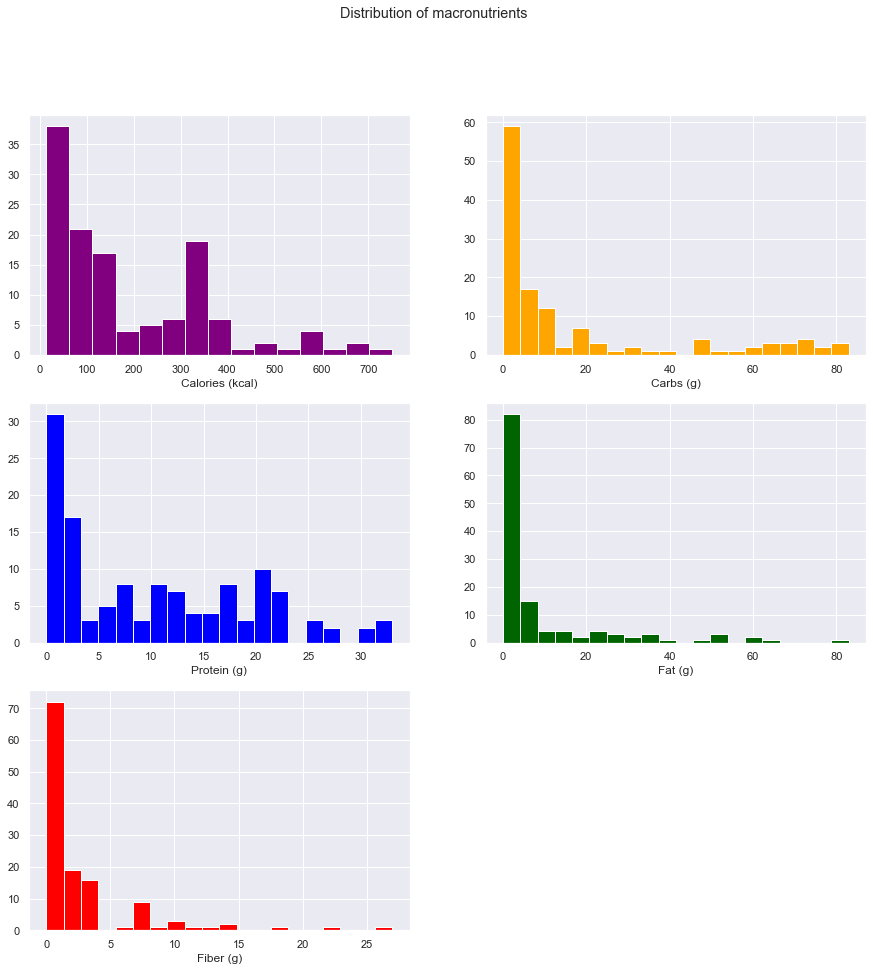

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('notebook')


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(15,15))
fig.suptitle('Distribution of macronutrients')
ax1.hist(solid_foods['Calories'], bins=15, color=macros_columns_dict['Calories'])
ax1.set(xlabel='Calories (kcal)')
ax2.hist(solid_foods['Carbs'], bins=20, color=macros_columns_dict['Carbs'])
ax2.set(xlabel='Carbs (g)')
ax3.hist(solid_foods['Protein'], bins=20, color=macros_columns_dict['Protein'])
ax3.set(xlabel='Protein (g)')
ax4.hist(solid_foods['Fat'], bins=20, color=macros_columns_dict['Fat'])
ax4.set(xlabel='Fat (g)')
ax5.hist(solid_foods['Fiber'], bins=20, color=macros_columns_dict['Fiber'])
ax5.set(xlabel='Fiber (g)')
ax6.axis('off')

plt.show()

In [ ]:
alpha=0.8
fig, ax = plt.subplots(sharey=True, figsize=(8,8))
#ax = fig.add_subplot()
ax.set(title='Caloric value vs. amount of macronutrients per 100g of food', 
       ylabel='kcal per 100g', 
       xlabel='Macronutrients per 100g (g)')
ax1 = ax.scatter(x='Protein', y='Calories', data=solid_foods, alpha=alpha)
ax2 = ax.scatter(x='Carbs', y='Calories', data=solid_foods, alpha=alpha)
ax3 = ax.scatter(x='Fat', y='Calories', data=solid_foods, alpha=alpha)

ax.legend((ax1, ax2, ax3), ('Proteins', 'Carbohydrates', 'Fats'), loc='best')
plt.show()



Limit in amount of proteins per 100g; linear dependence fat X calories

In [ ]:
import numpy as np

ax = dict(zip(macros_columns, [0,0,0,0,0]))
coef = dict(zip(macros_columns, [0,0,0,0,0]))
fig, ((ax['Carbs'], ax['Protein']), (ax['Fat'], ax['Fiber'])) = plt.subplots(2,2, figsize=(15,15))
Y = np.array(solid_foods['Calories'])
fig.suptitle('Macronutrients vs. caloric value')

for column in macros_columns_dict.keys():
    if column == 'Calories':
        continue
    
    else:
        X = np.array(solid_foods[column]) #numpy array for the x-axis
        p, cov = np.polyfit(X, Y, deg=1, cov=True)
        coef[column] = {'angular':(p[0], cov[0,0]), 'linear':(p[1], cov[1,1])}
        
        ax[column].scatter(x=column, y='Calories', data=solid_foods, color=macros_columns_dict[column])
        ax[column].plot(solid_foods[column], p[0]*solid_foods[column] + p[1], 'red', linewidth=0.7)
        ax[column].set(title='Caloric value vs. '+ column +' content per 100g of food', 
                   ylabel='kcal per 100g', 
                   xlabel= column + ' per 100g (g)')
        

print(coef['Carbs']['angular'])
    
plt.show()

Aprox. 8.85 kcal per gram of fat; get uncertainty, comment b

In [ ]:
X_caloriesT = np.array(4*(solid_foods['Protein'] + solid_foods['Carbs']) + 9*solid_foods['Fat'])
#X_caloriesP = np.array(p_prot[0]*solid_foods['Protein'] + p_carbs[0]*solid_foods['Carbs'] + p_fat[0]*solid_foods['Fat'])
a_kcT, b_kcT = np.polyfit(X_caloriesT, Y, deg=1)
#a_kcP, b_kcP = np.polyfit(X_caloriesP, Y, deg=1)

plt.scatter(x=X_caloriesT, y=solid_foods['Calories'])
plt.plot(X_caloriesT, a_kcT*X_caloriesT + b_kcT, 'red', linewidth=0.7)
plt.show()

print(a_kcT, b_kcT)

#plt.scatter(x=X_caloriesP, y=solid_foods['Calories'])
#plt.plot(X_caloriesP, a_kcP*X_caloriesP + b_kcP, 'red', linewidth=0.7)
#plt.show()

#print(a_kcP, b_kcP)


## Considering portion size

In [ ]:
portion_sizes = df[['Name', 'Portion_size_g']].set_index('Name')
portion_sizes.head()

solid_foods_portion = pd.merge(portion_sizes, solid_foods, on='Name', how='inner')
display(portion_sizes.shape)
display(solid_foods.shape)
display(solid_foods_portion.shape)
display(solid_foods_portion.head())

In [ ]:
for column in macros_columns:
    solid_foods_portion[column + '_per_portion'] = solid_foods_portion[column] * solid_foods_portion['Portion_size_g']
    solid_foods_portion.drop(column, axis=1, inplace=True)
    
display(solid_foods_portion.head())

In [ ]:
macronutrients_per_portion = {'Calories_per_portion':'purple', 'Carbs_per_portion':'orange', 'Protein_per_portion':'blue', 'Fat_per_portion':'green', 'Fiber_per_portion':'red'}

alpha=0.6
# fig, ax = plt.subplots(sharey=True)
# ax.set(title='Caloric value vs. amount of macronutrients per portion of food', 
#        ylabel='kcal per portion', 
#        xlabel='Macronutrients per portion (g)')
# ax1 = ax.scatter(x='Protein_per_portion', y='Calories_per_portion', data=solid_foods_portion, alpha=alpha)
# ax2 = ax.scatter(x='Carbs_per_portion', y='Calories_per_portion', data=solid_foods_portion, alpha=alpha)
# ax3 = ax.scatter(x='Fat_per_portion', y='Calories_per_portion', data=solid_foods_portion, alpha=alpha)

# ax.legend((ax1, ax2, ax3), ('Proteins_per_portion', 'Carbohydrates_per_portion', 'Fats_per_portion'))
# plt.show()

fig, ax = plt.subplots(figsize=(10,10))
for column in macronutrients_per_portion.keys():
    if column == 'Calories_per_portion':
        continue
    else:
        ax.scatter(x=column, y='Calories_per_portion', data=solid_foods_portion, alpha=0.4, color = macronutrients_per_portion[column])

ax.set(xlabel='Macronutrients (g)', ylabel='Calories per portion (kcal)', title='Caloric value vs. amount of macronutrients per portion of food')
ax.legend(('Proteins_per_portion', 'Carbohydrates_per_portion', 'Fats_per_portion', 'Fibers_per_portion'))

plt.show()

In [ ]:

ax = dict(zip(macronutrients_per_portion.keys(), [0,0,0,0,0]))
# print(ax)
# coef = dict(zip(columns, [0,0,0,0,0]))
fig, ((ax['Carbs_per_portion'], ax['Protein_per_portion']), (ax['Fat_per_portion'], ax['Fiber_per_portion'])) = plt.subplots(2,2, figsize=(15,15))
# Y = np.array(solid_foods['Calories'])
fig.suptitle('Macronutrients vs. caloric value')

for column in macronutrients_per_portion.keys():
    if column == 'Calories_per_portion':
        continue
    
    else:
        #X = np.array(solid_foods[column]) #numpy array for the x-axis
        #p, cov = np.polyfit(X, Y, deg=1, cov=True)
        #coef[column] = {'angular':(p[0], cov[0,0]), 'linear':(p[1], cov[1,1])}
        
        ax[column].scatter(x=column, y='Calories_per_portion', data=solid_foods_portion,color=macronutrients_per_portion[column])
        #ax[column].plot(solid_foods[column], p[0]*solid_foods[column] + p[1], 'red', linewidth=0.7)
        ax[column].set(title='Caloric value vs. '+ column, 
                   ylabel='kcal per portion', 
                   xlabel= column)

plt.show()

 - Visualize the avocado: superfood.
 - Where is the salad?

## Categories evaluation

In [ ]:
import seaborn as sns

current_palette = 'Set1'

# columns_portion = ['Calories_per_portion', 'Carbs_per_portion', 'Protein_per_portion', 'Fat_per_portion', 'Fiber_per_portion']
# for column in columns_portion:
#     if column == 'Calories_per_portion':
#         continue
#     else:
#         for cat in solid_foods_portion['Category_1']:
#             print(cat)
# #         ax= sns.scatterplot(data=solid_foods_portion, x=column, y='Calories_per_portion', hue='Category_1', legend='full', palette=current_palette)
# #         plt.xlabel(column + ' amount per portion (g)')
# #         plt.ylabel('Calories per portion (kcal)')
# #         plt.title('Caloric value vs. ' + column)
# #         plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.5), labels=['q','w','e','r','t','y','u','i','o','p'])
# #         plt.show()


columns_portion = ['Calories_per_portion', 'Carbs_per_portion', 'Protein_per_portion', 'Fat_per_portion', 'Fiber_per_portion']
for column in columns_portion:
    if column == 'Calories_per_portion':
        continue
    else:
        ax= sns.scatterplot(data=solid_foods_portion, x=column, y='Calories_per_portion', hue='Category_names', size=None, legend='full', palette=current_palette)
        plt.xlabel(column + ' amount per portion (g)')
        plt.ylabel('Calories per portion (kcal)')
        plt.title('Caloric value vs. ' + column)
        plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
        plt.show()


In [ ]:
#sns.set_style('whitegrid')
for column in columns:
    if column == 'Calories':
        continue
    else:
        fig, ax = plt.subplots(figsize=(8,8))
        ax= sns.scatterplot(data=solid_foods, x=column, y='Calories', hue='Category_names', size=None, legend='full', palette=current_palette)
        ax.set(ylabel='Calories per 100g (kcal)', xlabel=(column + ' amount per 100g (g)'), xlim=(-4, 1.1*solid_foods[column].max()), ylim=(-10, 900))
        plt.title('Caloric value vs. ' + column)
        plt.legend(loc='center right', bbox_to_anchor=(1.7, 0.5))
        plt.show()
